In [16]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [6]:
class ConfusionMatrix(object):
    
    def __init__(self,num_classes: int, labels: list):
        self.matrix = np.zeros((num_classes,num_classes))
        self.num_classes = num_classes
        self.labels = labels
        
    def update(self, preds, labels): # 将预测值和标签值累加
        for p,t in zip(preds,labels):
            self.matrix[p,t]+=1
            
    def summary(self):
        # calculate accuracy
        sum_TP = 0
        for i in range(self.num_classes):
            sum_TP += self.matrix[i,i]  # 对角线
        acc = sum_TP/np.sum(self.matrix)
        print("the model accuracy is",acc)
        
        
        # precision,recall,specificity
        table = PrettyTable()
        table.field_names = ["","Precision","Recall","Specificity"]
        for i in range(self.num_classes):
            TP = self.matrix[i,i]
            FP = np.sum(self.matrix[i,:]) - TP
            FN = np.sum(self.matrix[:,i]) - TP
            TN = np.sum(self.matrix) - TP - FP - FN
            
            Precision = round(TP/(TP + FP),3)
            Recall = round(TP/(TP + FN),3)
            Specificity = round(TN/(TN + FP),3)
            table.add_row([self.labels[i],Precision,Recall,Specificity])
        print(table)
        
    def plot(self):
        matrix = self.matrix
        print(matrix)
        plt.imshow(matrix,cmap=plt.cm.Blues)
        
        # 设置x轴坐标label
        plt.xtricks(range(self.num_classes),self.labels,rotation=45)
        # 设置y轴坐标label
        plt.ytricks(range(self.num_classes),self.labels)
        # 显示colorbar
        plt.colorbar()
        plt.xlabel('True Labels')
        plt.ylabel('Predicted Labels')
        plt.title('Confusion matrix')
        
        # 在图中标注数量，概率信息
        thresh = matrix.max()/2
        for x in range(self.num_classes):
            for y in range(self.num_classes):
                # 注意这里的matrix[y,x]不是matrix[x,y]
                info = int(matrix[y,x])
                plt.text(x,y,info,
                        verticalalignment='center',
                        horizontalalignment='center',
                        color='white' if info > thresh else "black")
        plt.tight_layout()
        plt.show()

In [8]:
data_root = os.path.abspath(os.path.join(os.getcwd(),"../datasets"))
image_path = data_root+"/flower_data/"
validation_dir = image_path+'val'

In [9]:
im_height = 224
im_width = 224
batch_size = 16

In [10]:
def pre_function(img):
    img = img/255.
    img = (img-0.5)*2.0
    return img

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
validation_image_generator = ImageDataGenerator(preprocessing_function = pre_function)
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              batch_size=batch_size,
                                                             shuffle=False,
                                                             target_size=(im_height,im_width),
                                                             class_mode='categorical')

Found 364 images belonging to 5 classes.


In [19]:
import import_ipynb
from AlexNet.AlexNetModel import AlexNet_v1,AlexNet_v2
import tensorflow as tf

model = AlexNet_v1(im_height=im_height,im_width=im_width,class_num=5)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), #因为已经softmax所以false
             metrics=["accuracy"])

In [13]:
model.summary() 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 48)        17472     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 128)       153728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 192)       221376

In [14]:
try:
    json_file = open('./AlexNet/class_indices.json','r')
    class_indict = json.load(json_file)
except Exception as e:
    print(e)
    exit(-1)

In [17]:
labels = [labels for _,labels in class_indict.items()]
confusion = ConfusionMatrix(num_classes=5,labels=labels)

In [ ]:
for step in range(math.ceil(total_val / batch_size)):
    val_images,val_labels = next(val_data_gen)
    

![image.png](attachment:01ae67b3-7b68-4b3f-ab94-cdeb57c9cd41.png)

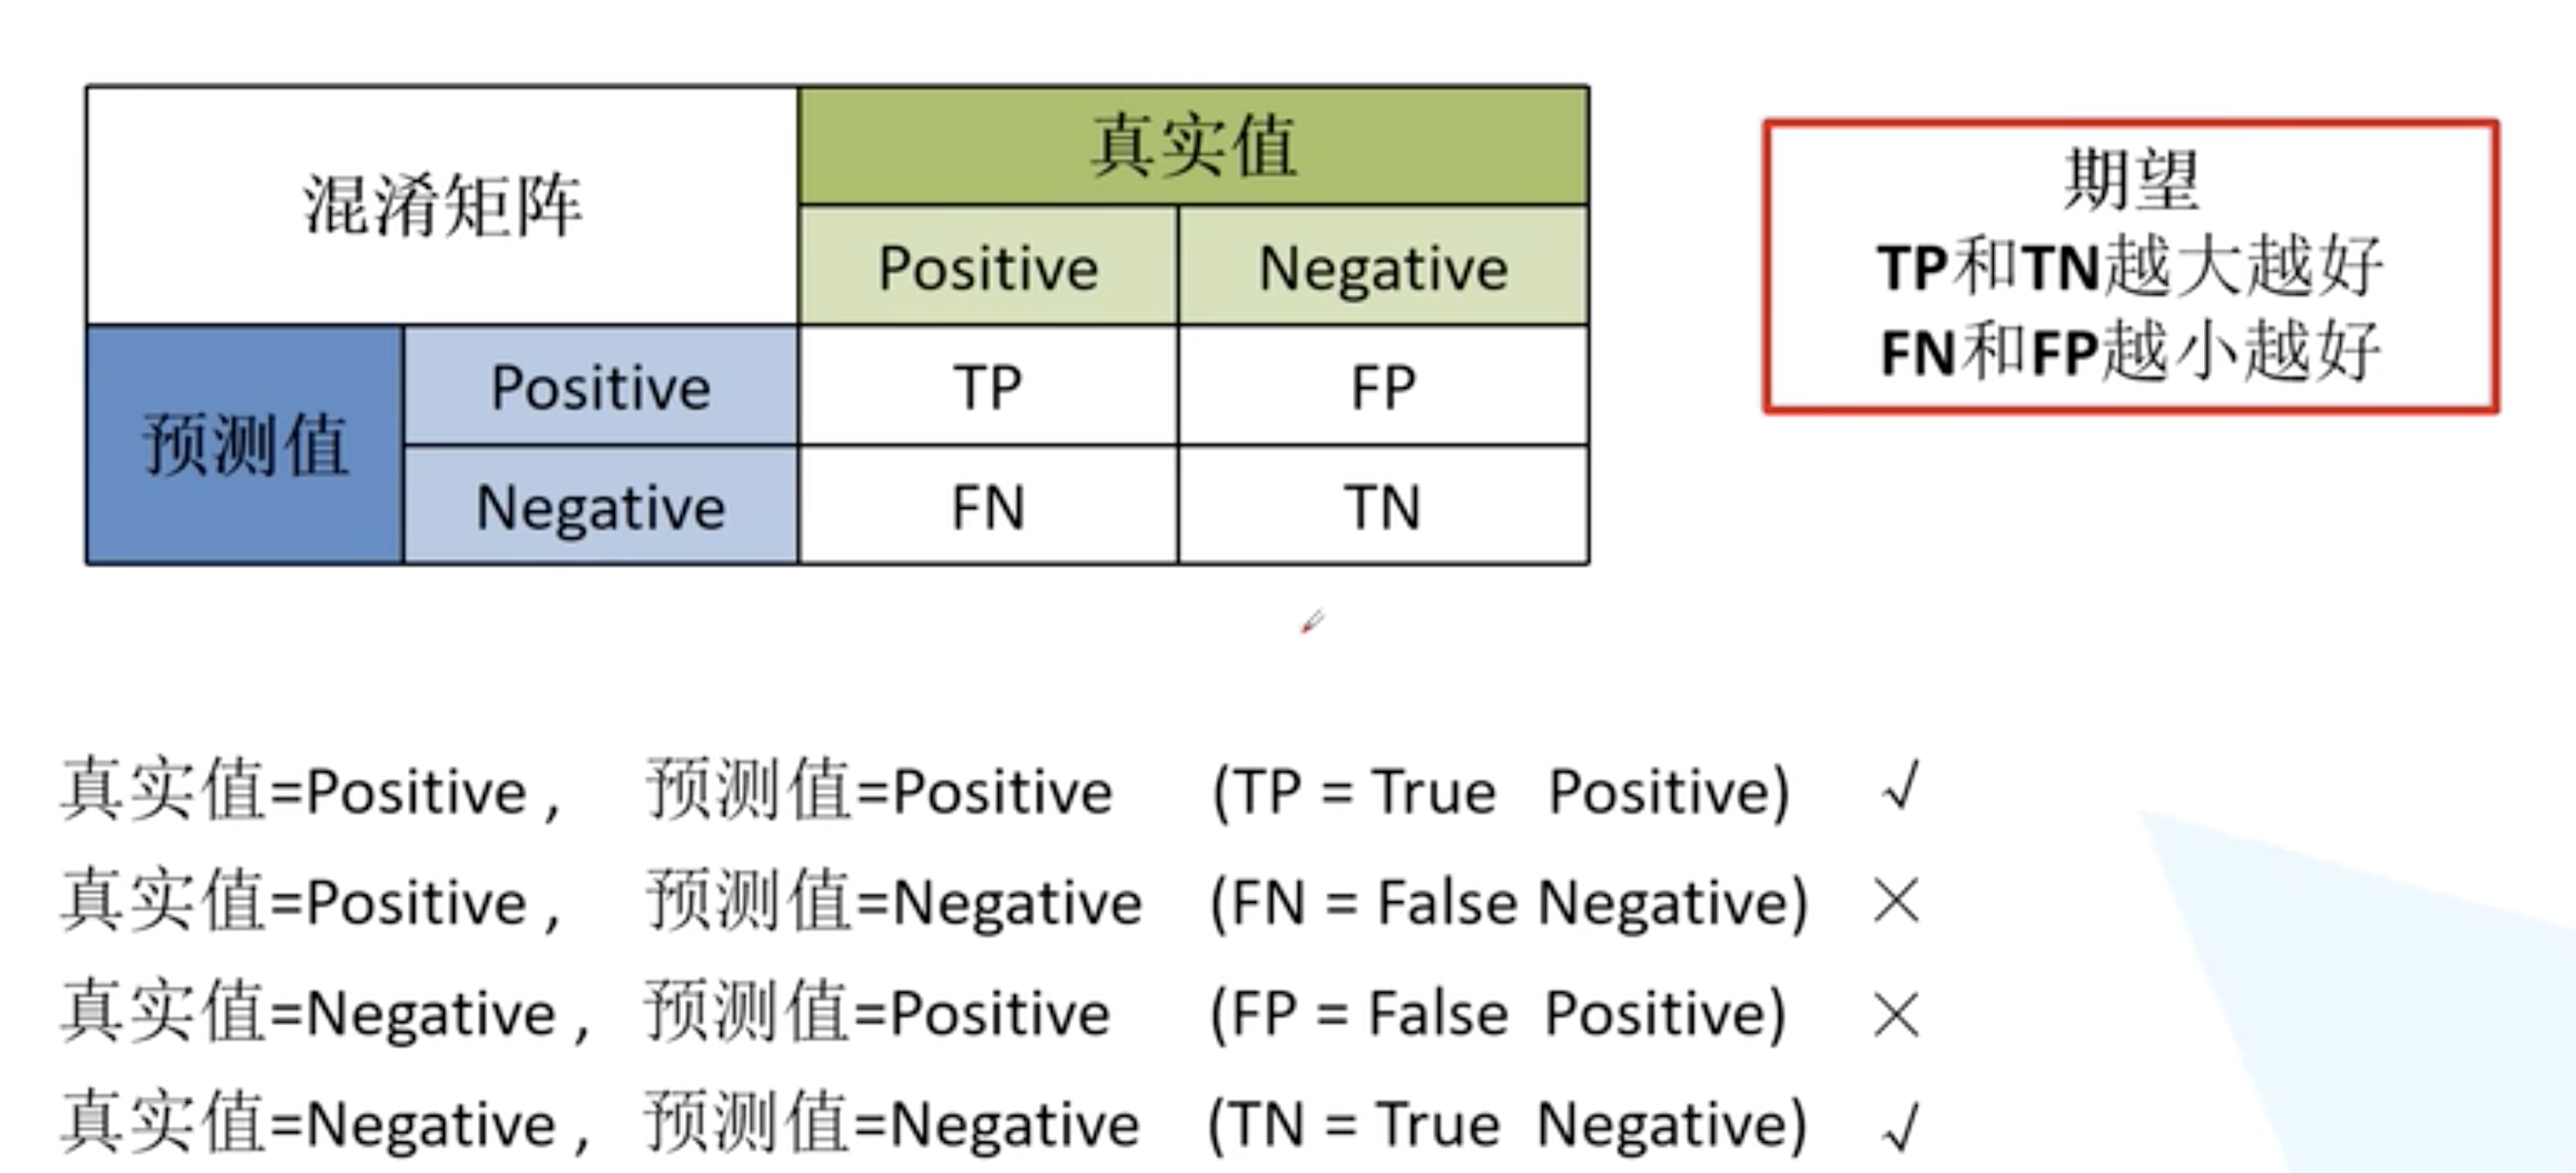

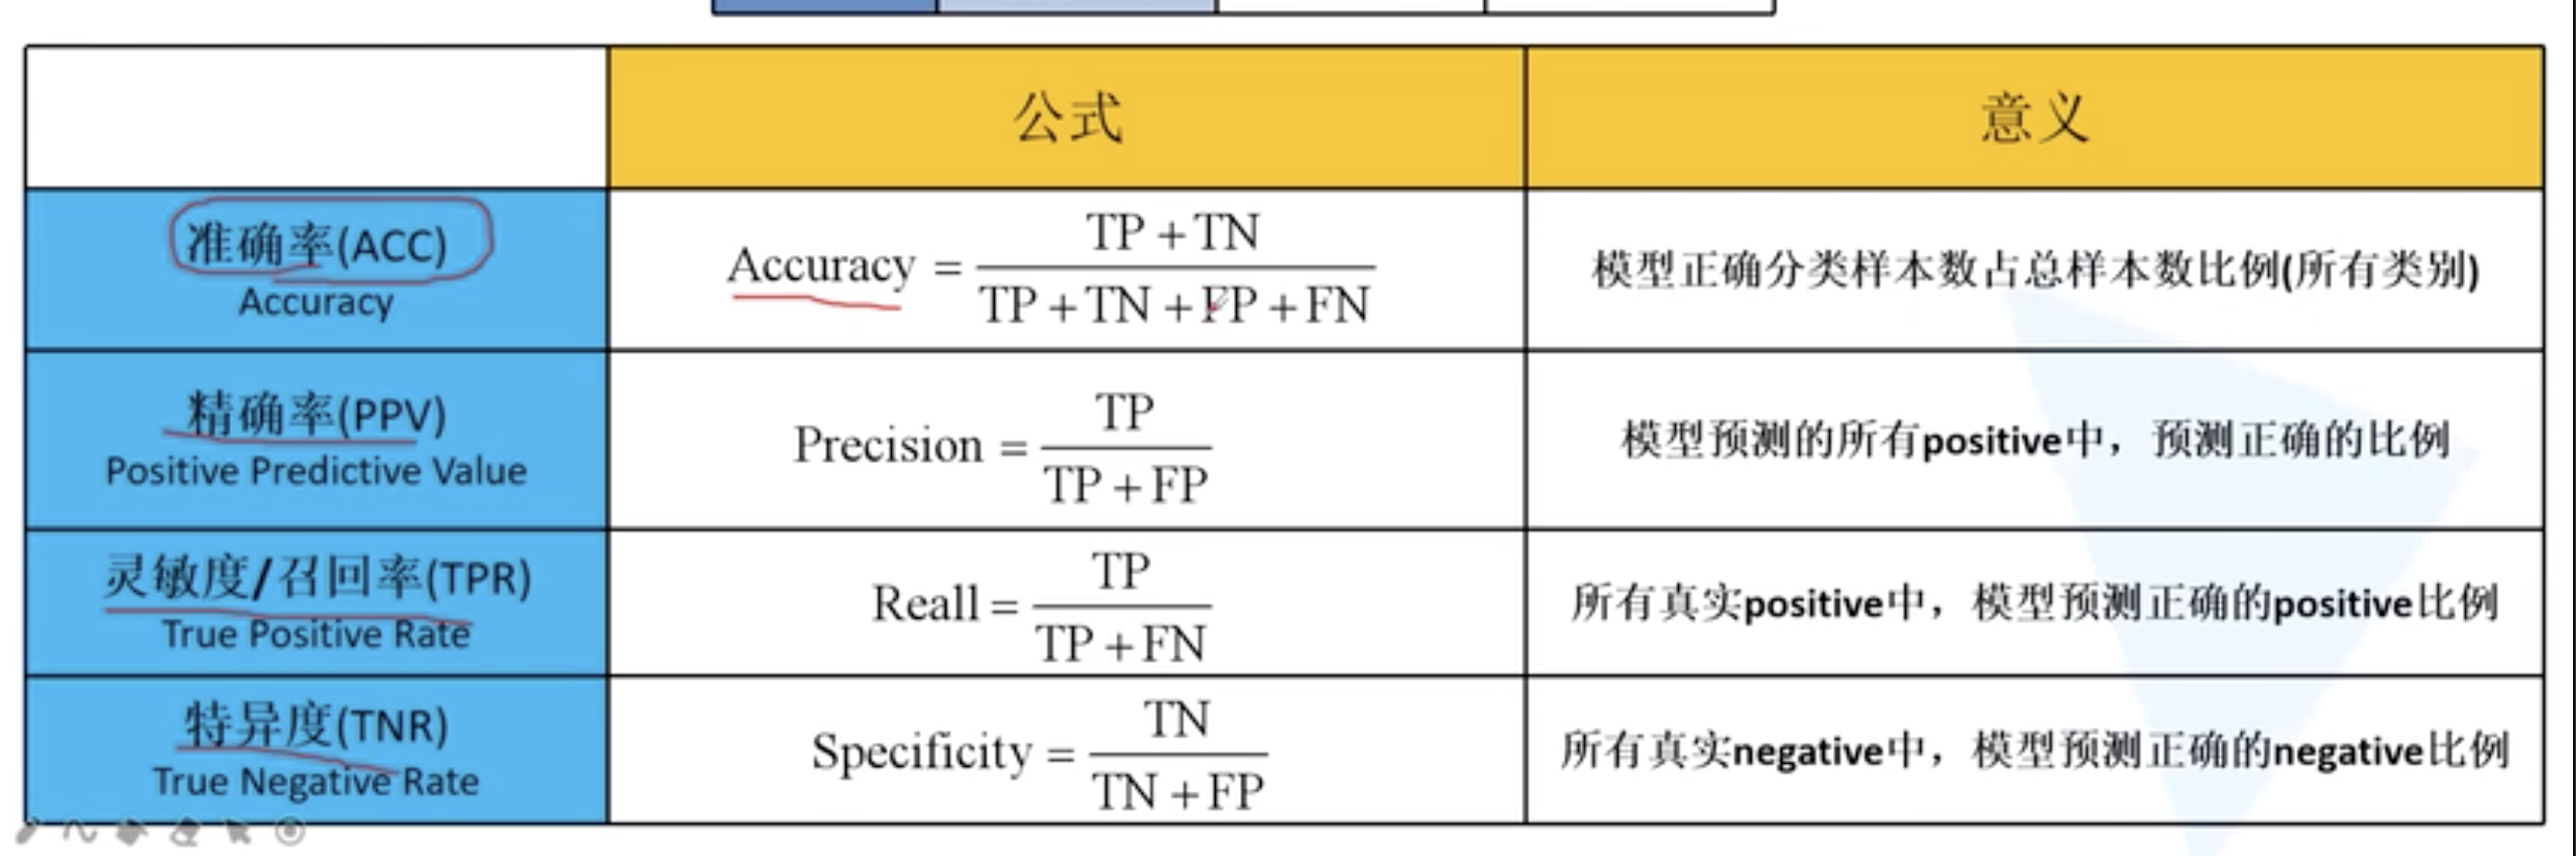